In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

In [3]:
# need to remove 8283, 8284 from dataset
data = pd.read_excel("data_insta.xlsx")

In [5]:
data.head()

,USERNAME,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,TEXT,NUMBER OF TAGS,LIST OF TAGS,DATE,"DAY(0 MONDAY,6 SUNDAY)",...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,georgiou82,1134619,915,18560,95,Every day is a #newday and every experience is...,2,#newera#newday,2017-02-11 11:05:10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,georgiou82,1134619,915,17710,86,#goodnight !!! The #weekend is ahead!!! Have a...,3,#goodnight#goodone#weekend,2017-02-11 00:33:10,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,georgiou82,1134619,915,11959,79,#tb #2007 #stous31dromous #megatv #greece #new...,7,#tb#memories#greece#stous31dromous#newyork#200...,2017-02-09 15:51:47,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,georgiou82,1134619,915,13608,37,Cold weather brings people together.... #filmi...,2,#mprousko4#filming,2017-02-08 18:21:57,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,georgiou82,1134619,915,15842,62,The youngest hearts might be the oldest souls....,4,#peru#lifelessons#tb#andreasgeorgiou✔️,2017-02-08 13:03:14,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,Unnamed: 36
count,3.000000e+04,30000.000000,30000.000000,30000.000000,1.0
mean,4.608031e+04,1531.426900,1861.486567,28.993933,1.0
std,8.745227e+04,2208.518135,4620.969015,365.380303,NaN
min,1.182000e+04,0.000000,0.000000,0.000000,1.0
25%,1.600600e+04,178.000000,301.000000,1.000000,1.0
50%,2.310000e+04,559.000000,742.000000,4.000000,1.0
75%,4.467800e+04,1565.000000,1816.000000,12.000000,1.0
max,1.134619e+06,7918.000000,158338.000000,26011.000000,1.0


In [7]:
data['TEXT'][4]

'The youngest hearts might be the oldest souls.... #lifelessons #andreasgeorgiou✔️ #tb #peru'

In [8]:
emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'
re.findall(emoji_regexp, data['TEXT'][4], re.UNICODE)

['✔']

In [9]:
text = data['TEXT'][1706]
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"
        u"\U00002A00-\U00002AFF"
        u"\U00002600-\U000026FF"
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀MΔΠUҒΔCTURΣR: Glock MΩDΣL: G26 Gen4CΔLIβΣR: 9 mm CΔPΔCITΨ: 10 Rounds βΔRRΣL LΣΠGTH: 3.4 ШΣIGHT: 615 gBy @charlotte_edc ?#guns#glock#arms#tactical#firearms#gunslove#selfdefense#photooftheday#9mm#igmilitia#instagood#photogun#firearmlove#glock26#firearms#gunpics#followme#firempotography#gunsdaly#selfdefense#gunporn#progun#handgun#armaswords#wordsguns
⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀MΔΠUҒΔCTURΣR: Glock MΩDΣL: G26 Gen4CΔLIβΣR: 9 mm CΔPΔCITΨ: 10 Rounds βΔRRΣL LΣΠGTH: 3.4 ШΣIGHT: 615 gBy @charlotte_edc ?#guns#glock#arms#tactical#firearms#gunslove#selfdefense#photooftheday#9mm#igmilitia#instagood#photogun#firearmlove#glock26#firearms#gunpics#followme#firempotography#gunsdaly#selfdefense#gunporn#progun#handgun#armaswords#wordsguns


# Post Description

In [10]:
data['TEXT'][6666]

'That eyes which never give up you, is like a dream which cannot be real and later it comes true! ???@burakozcivit #Kemalsoydere #Oldphoto #karasevda'

In [11]:
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      data['TEXT'][6666]) 

In [12]:
letters_only

'That eyes which never give up you  is like a dream which cannot be real and later it comes true      burakozcivit  Kemalsoydere  Oldphoto  karasevda'

In [13]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words
words

['that',
 'eyes',
 'which',
 'never',
 'give',
 'up',
 'you',
 'is',
 'like',
 'a',
 'dream',
 'which',
 'cannot',
 'be',
 'real',
 'and',
 'later',
 'it',
 'comes',
 'true',
 'burakozcivit',
 'kemalsoydere',
 'oldphoto',
 'karasevda']

In [20]:
from nltk.corpus import stopwords
words = [w for w in words if not w in stopwords.words("english")]
words

['eyes',
 'never',
 'give',
 'like',
 'dream',
 'cannot',
 'real',
 'later',
 'comes',
 'true',
 'burakozcivit',
 'kemalsoydere',
 'oldphoto',
 'karasevda']

In [21]:
" ".join(words)

'eyes never give like dream cannot real later comes true burakozcivit kemalsoydere oldphoto karasevda'

In [22]:
def cleanup(sentence):
    #letters_only = re.sub("[^a-zA-Z]", " ", sentence.split(', ')[0])
    #emojis = re.findall(emoji_regexp, sentence.split(', ')[0], re.UNICODE)
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", sentence)
        emojis = re.findall(emoji_regexp, sentence, re.UNICODE)
    except:
        letters_only = ''
        emojis = []
    words = letters_only.lower().split()        
    words = [w for w in words if not w in stopwords.words("english")]
    words = [w for w in words if len(w) > 1]
    return (" ".join(words)), (" ".join(emojis))

In [23]:
sentence, emojis = cleanup(data['TEXT'][4])

In [24]:
sentence

'youngest hearts might oldest souls lifelessons andreasgeorgiou tb peru'

In [25]:
emojis

'✔'

In [26]:
data['TEXT'].size

30000

In [27]:
clean = []
clean_emojis = []
for i in range( 0, data['TEXT'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/30000*100))+"% done")
    x,y = cleanup(data['TEXT'][i])
    clean.append(x)
    clean_emojis.append(y)

3% done
7% done
10% done
13% done
17% done
20% done
23% done
27% done
30% done
33% done
37% done
40% done
43% done
47% done
50% done
53% done
57% done
60% done
63% done
67% done
70% done
73% done
77% done
80% done
83% done
87% done
90% done
93% done
97% done
100% done


In [91]:
len(clean_emojis)

30000

In [292]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
 
clean_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 675) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
clean_features = clean_vectorizer.fit_transform(clean)

#tfidf_transformer = TfidfTransformer()
#clean_features = tfidf_transformer.fit_transform(clean_features)

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_features = clean_features.toarray()

In [293]:
clean_features.shape

(30000, 675)

In [294]:
vocab = clean_vectorizer.get_feature_names()
print(vocab)

['actor', 'actress', 'admin', 'adorable', 'aka', 'akahistory', 'akahistoryisblackhistory', 'akalegacy', 'akas', 'akatsuki', 'alpha', 'alphakappaalpha', 'alphaphialpha', 'alphatv', 'also', 'always', 'amazing', 'amsterdam', 'angel', 'anime', 'animeboy', 'animecosplay', 'animee', 'animefan', 'animegirl', 'animekawaii', 'animelife', 'animeworld', 'animikkelart', 'ant', 'aperolspritz', 'aphia', 'apisteuta', 'april', 'argiros', 'around', 'art', 'artist', 'arvenberen', 'athens', 'athensvoice', 'available', 'awesome', 'baby', 'back', 'backstage', 'bad', 'bag', 'bansko', 'basilisavramidis', 'beach', 'beautiful', 'beauty', 'best', 'bestoftheday', 'better', 'big', 'bikini', 'bio', 'birthday', 'black', 'blackandwhite', 'blessed', 'blog', 'blogbossbabe', 'blogger', 'blue', 'bnw', 'body', 'boruto', 'borutothemovie', 'boutique', 'brazil', 'breakfast', 'brigitte', 'brigitteboutique', 'brunette', 'burak', 'burakozcivit', 'call', 'captures', 'chalkidiki', 'chance', 'chatterbusy', 'check', 'chocolate', '

In [295]:
new_vocab = []
for word in vocab:
    if len(word)>3:
        new_vocab.append(word)
#print (' '.join(new_vocab))
print (new_vocab)

['actor', 'actress', 'admin', 'adorable', 'akahistory', 'akahistoryisblackhistory', 'akalegacy', 'akas', 'akatsuki', 'alpha', 'alphakappaalpha', 'alphaphialpha', 'alphatv', 'also', 'always', 'amazing', 'amsterdam', 'angel', 'anime', 'animeboy', 'animecosplay', 'animee', 'animefan', 'animegirl', 'animekawaii', 'animelife', 'animeworld', 'animikkelart', 'aperolspritz', 'aphia', 'apisteuta', 'april', 'argiros', 'around', 'artist', 'arvenberen', 'athens', 'athensvoice', 'available', 'awesome', 'baby', 'back', 'backstage', 'bansko', 'basilisavramidis', 'beach', 'beautiful', 'beauty', 'best', 'bestoftheday', 'better', 'bikini', 'birthday', 'black', 'blackandwhite', 'blessed', 'blog', 'blogbossbabe', 'blogger', 'blue', 'body', 'boruto', 'borutothemovie', 'boutique', 'brazil', 'breakfast', 'brigitte', 'brigitteboutique', 'brunette', 'burak', 'burakozcivit', 'call', 'captures', 'chalkidiki', 'chance', 'chatterbusy', 'check', 'chocolate', 'city', 'clothes', 'coffee', 'collection', 'color', 'colo

In [296]:
clean_features = pd.DataFrame(data=clean_features, columns=vocab)
clean_features.head()

,actor,actress,admin,adorable,aka,akahistory,akahistoryisblackhistory,akalegacy,akas,akatsuki,...,world,would,wu,www,yeni,yfsf,youtube,zcivit,zetaphibeta,zphib
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
j = clean_features.columns.get_level_values(0).isin(new_vocab)
clean_features = clean_features.loc[:,j]
clean_features.head()

,actor,actress,admin,adorable,akahistory,akahistoryisblackhistory,akalegacy,akas,akasthroughtheyears,akatsuki,...,world,would,xfactorgr,year,yeni,yfsf,youtube,zcivit,zetaphibeta,zphib
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
clean_emojis_vectorizer = DictVectorizer()
#description_emojis_vectorizer = CountVectorizer() 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
#X = description_vectorizer.fit(emojis)
#clean_description_emojis_features = description_vectorizer.transform(clean_description_emojis)
X = clean_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_emojis)

# Numpy arrays are easy to work with, so convert the result to an 
# array
clean_emojis_features = X.toarray()

In [98]:
clean_emojis_features.shape

(30000, 152)

In [99]:
#create list of unique emojis
emojis = set()
for i in range (30000):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            emojis.add(emoji)
emojis = list(emojis)
test = np.zeros(shape=(30000,152))

#create sentence to vector
for i in range (30000):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            test[i][emojis.index(emoji)]+=1

#verify results
#x = 0
#for i in range (20740):
    #for j in range(808):
        #if test[i][j] > 0:
            #x+=1
#x

In [100]:
test_emoji = np.zeros(shape=(1,152))
for i in range (30000):
    for j in range(152):
        if test[i][j] > 0:
            test_emoji[:,j]+=test[i][j]

In [144]:
count = 0
count_list = []
for i in range(152):
    if test_emoji[:,i]>250:
        count+=1
        count_list.append(i)
count_list

[3, 12, 28, 45, 53, 54, 76, 93, 109, 110, 116, 139, 148, 151]

In [145]:
clean_features_emoji = pd.DataFrame(data=test[:,count_list])
clean_features_emoji.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.040567,0.016000,0.022233,0.047867,0.062633,0.336967,0.020067,0.068467,0.099433,0.013000,0.154500,0.020367,0.041400,0.009133
std,0.427622,0.150149,0.279061,0.550017,0.656042,8.599668,0.175114,0.922862,1.762039,0.176159,0.655828,0.514160,0.480167,0.203923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,11.000000,11.000000,13.000000,12.000000,234.000000,6.000000,14.000000,57.000000,20.000000,22.000000,13.000000,12.000000,8.000000


In [146]:
emoji_set = set()
for i in range (30000):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            if emojis.index(emoji) in count_list:
                emoji_set.add(emoji)
print (' '.join(emoji_set))

☀ ✌ ☆ ❀ ❤ ✨ ♡ ✿ ⚋ ♥ ➖ ✧ ❂ ✔


# Hashtags

In [42]:
#data['tags'][0][1:-1].split(', ')[23][2:-1]
data['LIST OF TAGS'][0]

'#newera#newday'

In [43]:
sentence, emojis = cleanup(data['LIST OF TAGS'][0])

In [44]:
sentence

'newera newday'

In [45]:
emojis

''

In [47]:
clean_tag = []
clean_tag_emojis = []
for i in range( 0, data['LIST OF TAGS'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/30000*100))+"% done")
    x,y = cleanup(data['LIST OF TAGS'][i])
    clean_tag.append(x)
    clean_tag_emojis.append(y)

3% done
7% done
10% done
13% done
17% done
20% done
23% done
27% done
30% done
33% done
37% done
40% done
43% done
47% done
50% done
53% done
57% done
60% done
63% done
67% done
70% done
73% done
77% done
80% done
83% done
87% done
90% done
93% done
97% done
100% done


In [48]:
clean_tag[0:10]

['newera newday',
 'goodnight goodone weekend',
 'tb memories greece stous dromous newyork megatv',
 'mprousko filming',
 'peru lifelessons tb andreasgeorgiou',
 'love andreasgeorgiou',
 'work progress andreasgeorgiou',
 'dayout lovehim crazy godson',
 'andreasgeorgiou quoteoftheday',
 'actor onset newtvseries tv']

In [49]:
clean_tag_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_tag_features = clean_tag_vectorizer.fit_transform(clean_tag)
clean_tag_features = clean_tag_features.toarray()
clean_tag_features.shape

(30000, 250)

In [50]:
vocab = clean_tag_vectorizer.get_feature_names()
print(vocab)

['actor', 'actress', 'adorable', 'alphatv', 'amazing', 'amphictyonyofancientgreekcities', 'anime', 'animeboy', 'animegirl', 'animelife', 'ant', 'aperolspritz', 'apisteuta', 'art', 'athens', 'babylonstepback', 'backstage', 'bansko', 'bblogger', 'beautiful', 'beauty', 'bestoftheday', 'bikini', 'black', 'blogger', 'blogwithme', 'brigitte', 'burak', 'burakozcivit', 'celebrity', 'celestino', 'chalkidiki', 'contentcreator', 'createcontent', 'creative', 'cute', 'cyprus', 'dailybadass', 'denizsoydere', 'donttreadonme', 'dress', 'dromos', 'easter', 'ellada', 'europe', 'everybladeofgrass', 'fab', 'fabulous', 'fact', 'facts', 'family', 'fashion', 'fashionblogger', 'fashionexpert', 'fashionista', 'firearmlove', 'firearms', 'fitness', 'fitnessmodel', 'flowers', 'follow', 'followforfollow', 'followme', 'food', 'footwear', 'friends', 'fun', 'funny', 'getinspired', 'girl', 'girloftheday', 'glock', 'goals', 'good', 'gr', 'greece', 'greek', 'greekblogger', 'greekgirl', 'greeklife', 'greekpost', 'greekpo

In [51]:
clean_tag_features = pd.DataFrame(data=clean_tag_features, columns=vocab)
clean_tag_features.head()

,actor,actress,adorable,alphatv,amazing,amphictyonyofancientgreekcities,anime,animeboy,animegirl,animelife,...,webstagram,women,wordporn,words,wordsguns,wordswithmeaning,wu,xfactorgr,yfsf,zcivit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# XGBoost 

In [285]:
#dataset1 = np.hstack((clean_places_features,clean_mentions_features,clean_tag_features,clean_user_features,clean_features, clean_name_features))
dataset1 = np.hstack((clean_features, clean_features_emoji))
#dataset1 = np.hstack((clean_name_features))
#dataset2 = np.hstack((data.aliasNum.as_matrix().reshape(16539,1), data.numberFollowers.as_matrix().reshape(16539,1), data.numberFollowing.as_matrix().reshape(16539,1), data.numberPosts.as_matrix().reshape(16539,1)))
dataset2 = np.hstack((data.FOLLOWERS.as_matrix().reshape(30000,1), data.FOLLOWING.as_matrix().reshape(30000,1)))

In [286]:
dataset1.shape

(30000, 664)

In [287]:
dataset = np.hstack((dataset1,dataset2))
#dataset = np.hstack((clean_features,dataset2))

In [288]:
dataset.shape

(30000, 666)

In [297]:
pd.concat([clean_features, clean_features_emoji], axis=1).to_csv('NLP_feature_new.csv')

In [275]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [276]:
from sklearn.cross_validation import train_test_split

In [289]:
x_train, x_test, y_train, y_test = train_test_split(dataset, np.ravel(data.LIKES), test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(clean_features, np.ravel(data.LIKES), test_size=0.2, random_state=42)

In [290]:
from sklearn.metrics import mean_squared_error
model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.48, n_estimators=361)
#model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.005, n_estimators=1000)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

1589.74178289


In [279]:
model_xgb.score(x_test,y_test)

0.88815664062609256

500 post + emoji > 175: 4406.41621941

500 post + emoji > 200: 4401.21741895

500 post + emoji > 250: 4390.61582903

500 post + emoji > 275: 4390.61582903

500 post + emoji > 400: 4399.59154944

400 post + emoji > 250: 4400.99444182

600 post + emoji > 250: 4296.32618265

700 post + emoji > 250: 4225.89985807, 1547.05872173

675 post + emoji > 250: 1543.21789075

500 Hashtags + 250 post: 

500 Hashtags + 500 post: 

250 Hashtags + 500 post: 

500 post: 4407.20005375

750 post: 

In [73]:
data.describe()

,FOLLOWERS,FOLLOWING,LIKES,COMMENTS,Unnamed: 36
count,3.000000e+04,30000.000000,30000.000000,30000.000000,1.0
mean,4.608031e+04,1531.426900,1861.486567,28.993933,1.0
std,8.745227e+04,2208.518135,4620.969015,365.380303,NaN
min,1.182000e+04,0.000000,0.000000,0.000000,1.0
25%,1.600600e+04,178.000000,301.000000,1.000000,1.0
50%,2.310000e+04,559.000000,742.000000,4.000000,1.0
75%,4.467800e+04,1565.000000,1816.000000,12.000000,1.0
max,1.134619e+06,7918.000000,158338.000000,26011.000000,1.0


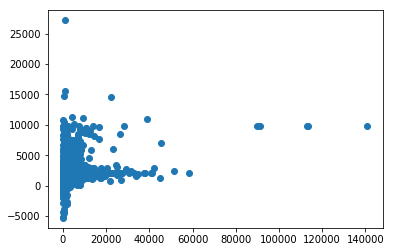

In [76]:
plt.scatter(y_test, y_pred)
plt.show()

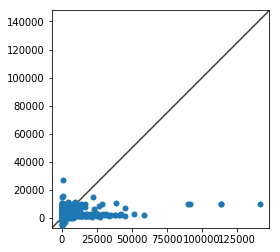

In [78]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

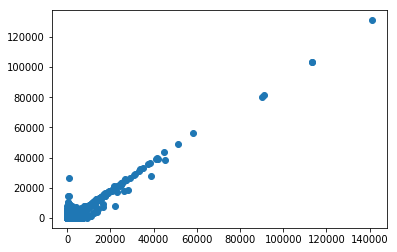

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test, abs(y_pred-y_test))